<a href="https://colab.research.google.com/github/gibiee/Predict_Pneumonia/blob/master/%ED%9D%89%EB%B6%80%20%EC%97%91%EC%8A%A4%EB%A0%88%EC%9D%B4%EB%A5%BC%20%ED%86%B5%ED%95%9C%20%EC%A7%88%EB%B3%91%20%EC%A7%84%EB%8B%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -q "./drive/My Drive/양재 팀프로젝트/흉부 엑스레이/Dataset.zip" -d dataset
!ls

dataset  drive	sample_data


In [ ]:
import tensorflow as tf

# model = tf.keras.applications.VGG16(weights=None, include_top=True, input_shape=(224,224,1), classes=4)
# model = tf.keras.applications.VGG19(weights=None, include_top=True, input_shape=(224,224,1), classes=4)
# model = tf.keras.applications.ResNet50(weights=None, include_top=True, input_shape=(224,224,1), classes=4)
# model = tf.keras.applications.ResNet101(weights=None, include_top=True, input_shape=(224,224,1), classes=4)
model = tf.keras.applications.Xception(weights=None, include_top=True, input_shape=(224,224,1), classes=4)
# model = tf.keras.applications.InceptionV3(weights=None, include_top=True, input_shape=(224,224,1), classes=4)
# model = tf.keras.applications.InceptionResNetV2(weights=None, include_top=True, input_shape=(224,224,1), classes=4)

# print(model.summary())

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory('./dataset/', target_size=(224,224), color_mode='grayscale', 
                                              class_mode='categorical', subset='training')

Found 9435 images belonging to 4 classes.


In [ ]:
test_generator = datagen.flow_from_directory('./dataset/', target_size=(224,224), color_mode='grayscale',
                                              shuffle=False, class_mode='categorical', subset='validation')

Found 2357 images belonging to 4 classes.


In [ ]:
model.fit_generator(train_generator, epochs=50)

In [ ]:
history = model.fit_generator(train_generator, epochs=50, validation_data=test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
295/295 [==============================] - 168s 569ms/step - loss: 0.6111 - accuracy: 0.7399 - val_loss: 1.5935 - val_accuracy: 0.3182
Epoch 2/50
295/295 [==============================] - 160s 542ms/step - loss: 0.4693 - accuracy: 0.8030 - val_loss: 1.3846 - val_accuracy: 0.4319
Epoch 3/50
295/295 [==============================] - 162s 549ms/step - loss: 0.4251 - accuracy: 0.8194 - val_loss: 0.6179 - val_accuracy: 0.7645
Epoch 4/50
295/295 [==============================] - 161s 545ms/step - loss: 0.3888 - accuracy: 0.8360 - val_loss: 0.8252 - val_accuracy: 0.7102
Epoch 5/50
295/295 [==============================] - 161s 547ms/step - loss: 0.3586 - accuracy: 0.8531 - val_loss: 0.5550 - val_accuracy: 0.7849
Epoch 6/50
295/295 [==============================] - 161s 546ms/step - loss: 0.3101 - accuracy: 0.8702 - val_loss: 0.5646 - val_accuracy: 0.7768
Epoch 7/50
295/295 [============================

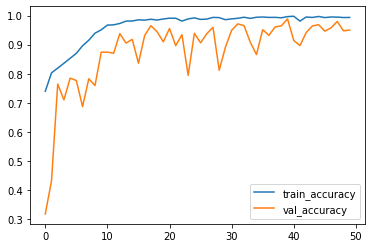

In [ ]:
# 학습 과정에서의 loss와 val_loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
print(model.metrics_names)
model.evaluate_generator(test_generator)

['loss', 'accuracy']
Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.1706990897655487, 0.9499363303184509]

In [ ]:
# accuracy 검증
import numpy as np

predict = model.predict_generator(test_generator)
len([i for i,j in zip(np.argmax(predict, axis=1), test_generator.labels) if i==j]) / len(test_generator.labels)

Instructions for updating:
Please use Model.predict, which supports generators.


0.9499363597793806

In [ ]:
from sklearn.metrics import confusion_matrix

print(test_generator.class_indices)
cm = confusion_matrix(np.argmax(predict, axis=1), test_generator.labels)
print(cm)

{'바이러스성 폐렴': 0, '박테리아성 폐렴': 1, '정상': 2, '코로나': 3}
[[588  13   0   0]
 [101 736   1   0]
 [  2   1 850   0]
 [  0   0   0  65]]


In [ ]:
model.save('./drive/My Drive/양재 팀프로젝트/흉부 엑스레이/model_epoch50.h5')

In [ ]:
# t1 = [1,1,2,2,3,3] # 예측
# t2 = [1,1,1,1,1,1] # 정답

# confusion_matrix(t1, t2)